In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import datetime


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
    #In the cmd line type: conda install python-graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

C:\Users\oripo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pickle.load(open("df_a.dat", "rb"))

# פיצול לטריין וטסט

In [5]:
train_df, test_df= train_test_split(df, test_size = 0.2, random_state=7)

In [6]:
y = train_df["No-show_"]
X = train_df

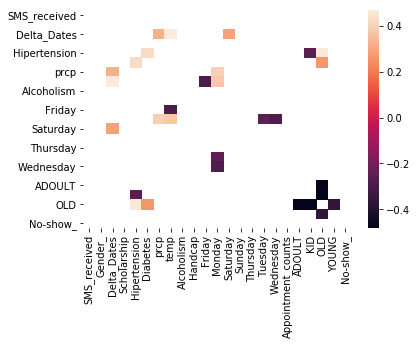

In [10]:
corr_df=X.corr()
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.25) | (corr_df <= -0.25)) ] )

In [12]:
corr_df['SMS_received']
# לשליחת ההודעה יש קורלציה עם הדלתא בימים, ועם יום שישי

SMS_received          1.000000
Gender_              -0.029050
Delta_Dates           0.210267
Scholarship           0.021128
Hipertension         -0.034169
Diabetes             -0.025718
prcp                  0.005605
temp                 -0.016400
Alcoholism           -0.008224
Handcap              -0.022463
Friday               -0.178481
Monday                0.014151
Saturday              0.076027
Sunday               -0.018648
Thursday             -0.107386
Tuesday               0.039146
Wednesday             0.115554
Appointment_counts   -0.037000
ADOULT                0.020972
KID                   0.004577
OLD                  -0.032716
YOUNG                 0.018829
No-show_             -0.018904
Name: SMS_received, dtype: float64

In [29]:
corr_df['No-show_']
# הקורלציה היחידה שיש היא שלזקנים יש 10 אחוז קולרלציה בהברזות

SMS_received         -0.018904
Gender_               0.001218
Delta_Dates           0.016517
Scholarship           0.049465
Hipertension         -0.049665
Diabetes             -0.022230
prcp                 -0.004347
temp                  0.010594
Alcoholism            0.020646
Handcap              -0.002197
Friday                0.023280
Monday                0.016357
Saturday             -0.030761
Sunday               -0.012198
Thursday             -0.006609
Tuesday               0.001986
Wednesday             0.000515
Appointment_counts   -0.007689
ADOULT                0.038732
KID                   0.039997
OLD                  -0.105320
YOUNG                 0.064659
No-show_              1.000000
Name: No-show_, dtype: float64

In [14]:
corr_df['Delta_Dates']
# יש קורלציה עם סופש לאנשים נטייה לקבוע רחוק קדימה לסופש?

SMS_received          0.210267
Gender_               0.002253
Delta_Dates           1.000000
Scholarship          -0.000940
Hipertension         -0.021157
Diabetes             -0.016241
prcp                  0.323611
temp                  0.466782
Alcoholism           -0.005533
Handcap              -0.005707
Friday               -0.207129
Monday                0.233595
Saturday              0.285777
Sunday               -0.046414
Thursday             -0.180690
Tuesday              -0.243792
Wednesday             0.050900
Appointment_counts   -0.013095
ADOULT                0.009663
KID                   0.012596
OLD                  -0.022639
YOUNG                 0.007423
No-show_              0.016517
Name: Delta_Dates, dtype: float64

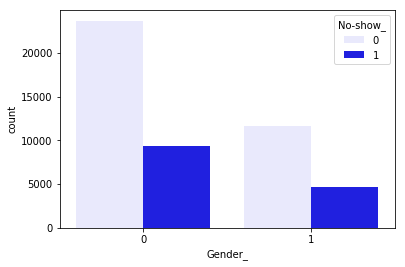

In [20]:
sns.countplot(x='Gender_', data=df,  color='blue',hue = 'No-show_')
#יותר בנות הולכות לקופ"ח, אבל הברזות דומות

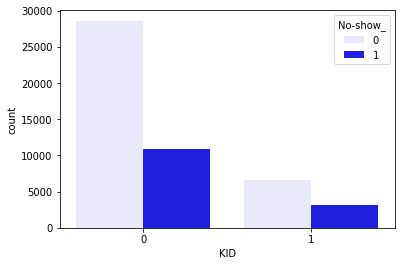

In [25]:
sns.countplot(x='KID', data=df,  color='blue',hue = 'No-show_')

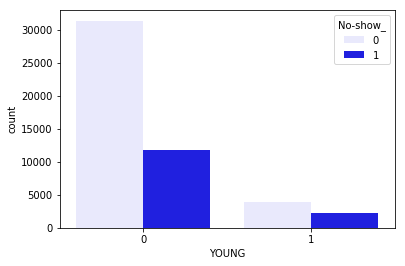

In [26]:
sns.countplot(x='YOUNG', data=df,  color='blue',hue = 'No-show_')
#צעירים מבריזים הכי הרבה ויש הכי מעט כאלו

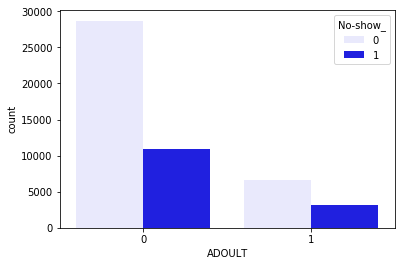

In [30]:
sns.countplot(x='ADOULT', data=df,  color='blue',hue = 'No-show_')

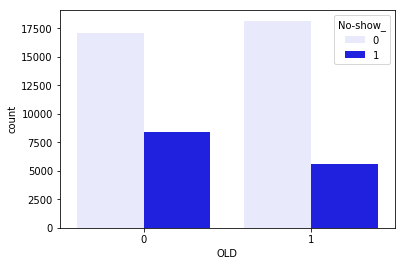

In [31]:
sns.countplot(x='OLD', data=df,  color='blue',hue = 'No-show_')
#זקנים מבריזים הכי מעט, ויש הכי הרבה כאלו

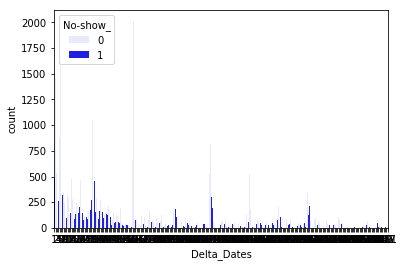

In [36]:
sns.countplot(x='Delta_Dates', data=df, color='blue',hue = 'No-show_')

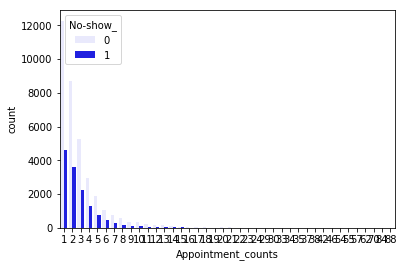

In [37]:
sns.countplot(x='Appointment_counts', data=df, color='blue',hue = 'No-show_')

In [34]:
train_df.columns

Index(['AppointmentDay', 'SMS_received', 'Gender_', 'Delta_Dates',
       'Scholarship', 'Hipertension', 'Diabetes', 'prcp', 'temp', 'Alcoholism',
       'Handcap', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Appointment_counts', 'ADOULT', 'KID', 'OLD',
       'YOUNG', 'No-show_'],
      dtype='object')

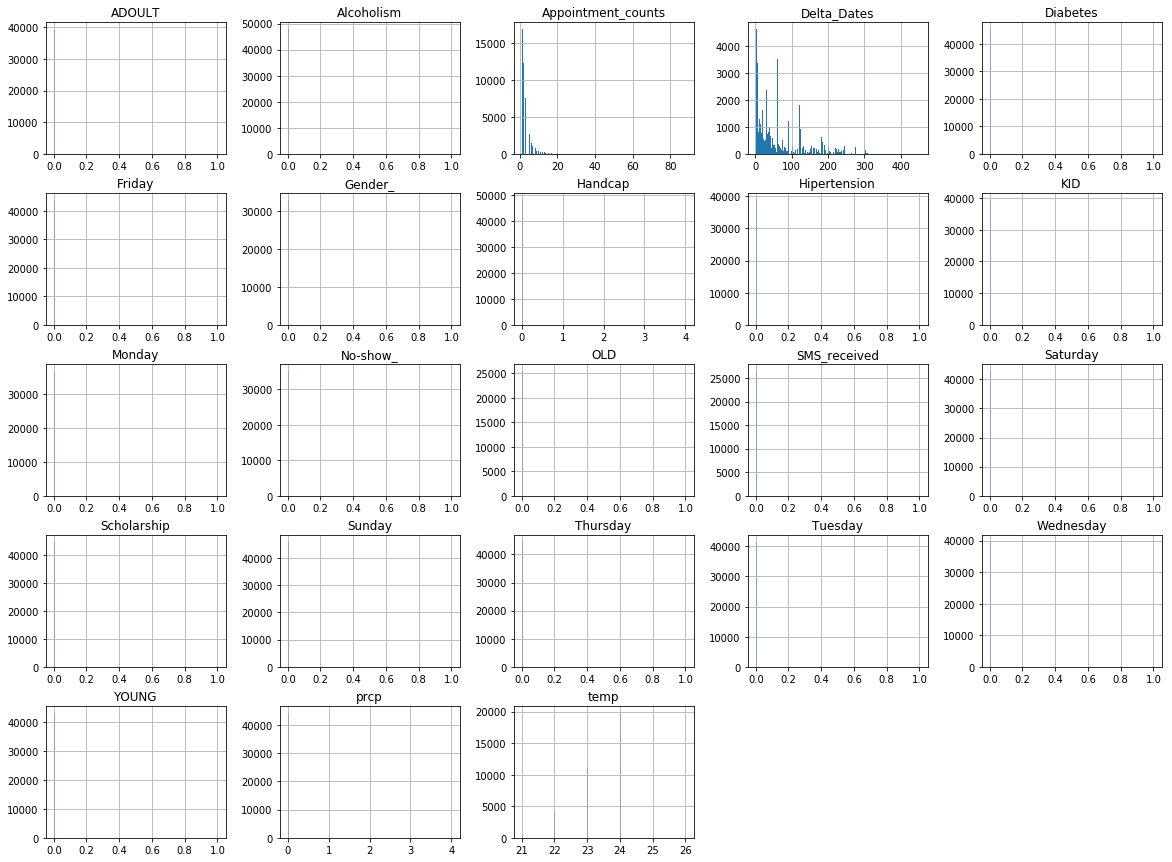

In [35]:
df.hist(bins = 200, figsize = (20,15), column=['AppointmentDay', 'SMS_received', 'Gender_', 'Delta_Dates',
       'Scholarship', 'Hipertension', 'Diabetes', 'prcp', 'temp', 'Alcoholism',
       'Handcap', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Appointment_counts', 'ADOULT', 'KID', 'OLD',
       'YOUNG', 'No-show_']) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

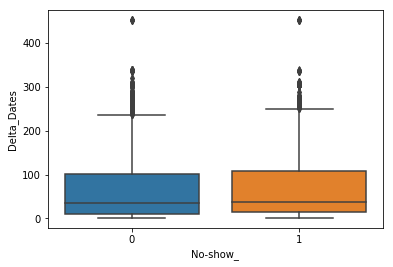

In [40]:
sns.boxplot(x='No-show_', y='Delta_Dates', data=train_df)